# Анализ убытков приложения ProcrastinatePRO+

Задача для маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

In [1]:
#Чтение данных
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#Загрузка данных
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')
                    

## Описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта. Структура датасета:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Файл orders_info_short.csv содержит информацию о заказах:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Файл costs_info_short.csv содержит информацию о расходах на рекламу:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Задачи
На данном этапе необходимо выполнить следующие действия:
- Изучить данные и выполнить предобработку. 
- Проверить данные на пропуски и дубликаты. 
- Проверить типы данных на корректность 
- Обратить внимание на столбцы с датой и временем

### Типы данных, пропуски, дубликаты 

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Регистр


In [9]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [10]:
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')
costs.columns = costs.columns.str.replace(' ', '_')

#### Типы данных

In [11]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Дубликаты

In [12]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())


0

0

0

#### Пропуски

In [13]:
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())


user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

Таким образом еще раз было проверено, что пропусков и дубликатов в данных нет

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg({'session_start': 'first',
                      'channel': 'first',
                      'device': 'first',
                      'region': 'first'})
                .rename(columns={'session_start': 'first_ts'})
                .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].astype('datetime64[W]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'channel'])
                         .agg({'user_id': 'nunique'})
                         .rename(columns={'user_id': 'unique_users'})
                         .reset_index()
                )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
def plot_retention(retention, retention_history, horizon, window=1):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=1):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=1):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Определим минимальную и максимальную дату привлечения пользователей. Для начала необходимо создать таблицу с профилями пользователей

In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,week,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,2019-05-02,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,2019-07-04,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,2019-09-26,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,2019-08-22,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,2019-09-26,False,0.230769


Теперь можно вычислять даты:

In [23]:
print('Min дата привлечения:', profiles.dt.min(),
     '\nMax дата привлечения:', profiles.dt.max())

Min дата привлечения: 2019-05-01 
Max дата привлечения: 2019-10-27


# Шаг 3.1 Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

In [24]:
paying_users = round(profiles.payer.mean() * 100, 2)
print('Доля платящих пользователей в %:', paying_users)

Доля платящих пользователей в %: 5.92


In [25]:
def group_tbl(column):
#сгруппируем таблицу по столбцу user_id, посчитаем кол-во уникальных юзеров в группе
    users_group = (profiles.groupby(column)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'quantity'})
    )
#добавим столбец с долей юзеров в группе от их общего числа 
    users_group['share'] = users_group['quantity'] / len(profiles) * 100

#сгруппируем таблицу по столбцу user_id для тех, кто использует платную подписку и посчитаем кол-во уникальных юзеров в группе
    payers_group = (profiles.query('payer == True')
            .groupby(column)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'quantity'})
    )
#добавим столбец с долей юзеров с подпиской в группе от их общего числа  
    payers_group['share'] = payers_group['quantity'] / len(profiles.query('payer == True')) * 100

#соединим две таблицы
    tbl = users_group.merge(payers_group, on=column, how='right')

#добавим столбец с долей юзеров с подпиской относительно общего кол-ва юзеров в рамках каждой группы
    tbl['share_in_group'] = tbl['quantity_y'] / tbl['quantity_x'] * 100

    tbl = tbl.rename(columns={'quantity_x': 'users',
                                  'quantity_y': 'payer_users',
                                  'share_x': 'share',
                                  'share_y': 'payer_share'})

    tbl = tbl.sort_values('payer_share', ascending=False)


    return tbl

Напишем еще одну функцию, где 
- users - количество юзеров в группе
- share - процент юзеров от общего числа по всем группам
- payer_users - юзеры с подпиской в группе
- payer_share - процент юзеров с подпиской в группе к юзерам с подпиской по всем группам
- share_in_group - процент юзеров с подпиской в своей группе

In [26]:
def style(tbl):
    tbl = tbl.style.format({'share': '{:.2f}%',
                                'payer_share': '{:.2f}%',
                                'share_in_group': '{:.2f}%',
                                'acquisition_cost': '{:.2f}'})
    return tbl

In [27]:
#Построим таблицу распределения по регионам (странам)
group_tbl('region')

,users,share,payer_users,payer_share,share_in_group
region,,,,,
United States,100002,66.664445,6902,77.716473,6.901862
UK,17575,11.716042,700,7.881995,3.982930
France,17450,11.632713,663,7.465376,3.799427
Germany,14981,9.986801,616,6.936156,4.111875


Смотря на данное распределение, можно сделать следующий вывод:

- По конвертации и по кол-ву пользователей в приоритете Америка: почти 67% юзеров - Американцы, из них платят за подписку 78%.
- Из США в покупатели переходит 7% пользователей, а из других регионов - около 4%.


# Шаг 3.2 Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

In [28]:
#Построим таблицу распределения по устройствам
group_tbl('device')

,users,share,payer_users,payer_share,share_in_group
device,,,,,
iPhone,54479,36.317396,3382,38.081297,6.207897
Android,35032,23.353421,2050,23.082986,5.851793
Mac,30042,20.026932,1912,21.529107,6.364423
PC,30455,20.302251,1537,17.306610,5.046790


Исходя из этой таблицы видно, что:
- iPhone - самый популярный девайс у пользователей приложения (с него в приложение заходят 36% юзеров). А также второе место у iPhone по платящией аудитории. 
- Также Mac - самый популярный девайс у платящей аудитории 
- В целом, продукция Apple показывают конверсию в покупателей лучше, чем пользователи других устройств.

# Шаг 3.3 По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [29]:
# распределение по каналам
group_tbl('channel')

,users,share,payer_users,payer_share,share_in_group
channel,,,,,
FaceBoom,29144,19.428297,3557,40.051796,12.204914
TipTop,19561,13.039971,1878,21.146267,9.600736
organic,56439,37.623993,1160,13.061592,2.055316
WahooNetBanner,8553,5.701696,453,5.100777,5.296387
AdNonSense,3880,2.586529,440,4.954397,11.340206
RocketSuperAds,4448,2.965175,352,3.963518,7.913669
LeapBob,8553,5.701696,262,2.950118,3.063253
OppleCreativeMedia,8605,5.736361,233,2.623578,2.707728
lambdaMediaAds,2149,1.432590,225,2.533498,10.469986


По таблице сделаем следующие выводы:
- Большая часть пользователей с подпиской переходит с канала FaceBoom - 12%. 
- Затем TipTop - 9%. 
- На третьем месте расположились естественные алгоритмы сторов (органическая выдача составила 2%). 
Подводя итог вышесказанному, 3 самых эффективных каналов для групп это - FaceBoom, AdNonSense и lambdaMediaAds.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

# Шаг 4.1 Сколько денег потратили? Всего / на каждый источник / по времени

Сколько денежных средств было потрачено всего?

In [30]:
#исключим органический канал трафика
total = costs.query('channel != "organic"')['costs'].sum()
display(total)

105497.30000000002

Сколько денежных средств было потрачено на каждый источник?

In [31]:
#выведем таблицу, просуммируя все затраты на каждый канал, исключим органический трафик
total_source = profiles.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = 'sum')
total_source.query('channel != "organic"').sort_values(by = 'acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Построим сводную таблицу для динамики трафика по месяцам и неделям, далее построим по данным графики

In [33]:
pivot_profiles = profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum')
display(pivot_profiles)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
month,,,,,,,,,,,
2019-05-01,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4,0.0
2019-06-01,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2,0.0
2019-07-01,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2,0.0
2019-08-01,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0,0.0
2019-09-01,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2,0.0
2019-10-01,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6,0.0


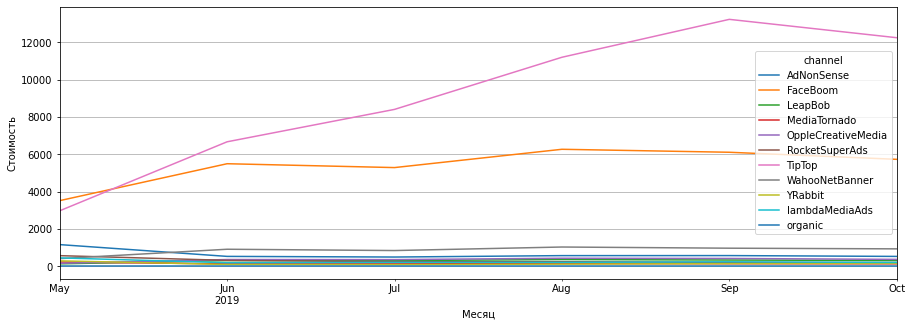

In [34]:
pivot_profiles.plot(grid=True, figsize=(15,5), xlabel='Месяц', ylabel='Стоимость')
plt.show()

In [35]:
pivot_profiles = profiles.pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum')

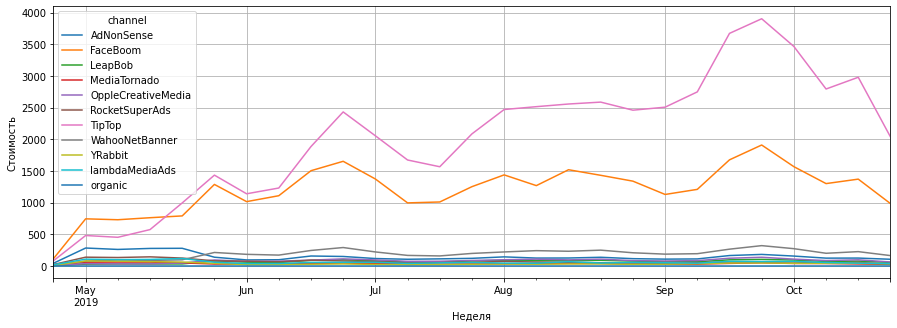

In [36]:
pivot_profiles.plot(grid=True, figsize=(15,5), xlabel='Неделя', ylabel='Стоимость')
plt.show()

Можно сделать вывод, что каналы трафика Tip Top и FaseBoom были спонсированы горазло больше, нежели другие каналы. 
Также на канал Тip-Тор было потрачено больше всего денежных средств, это подтверждает приведенную ранее таблицу, а также график по неделям и месяцам.  

# Шаг 4.2 Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [37]:
# средняя стоимость привлеченя 1 покупателя для каждого канала
users_for_channel = group_tbl('channel')
users_for_channel = users_for_channel.merge(profiles.query('channel != "organic"').groupby('channel')\
                                            .agg({'acquisition_cost':'mean'})\
                                            .sort_values(by = 'acquisition_cost', ascending = False), on = 'channel', how = 'left')
style(users_for_channel)
                              

,users,share,payer_users,payer_share,share_in_group,acquisition_cost
channel,,,,,,
FaceBoom,29144,19.43%,3557,40.05%,12.20%,1.11
TipTop,19561,13.04%,1878,21.15%,9.60%,2.80
organic,56439,37.62%,1160,13.06%,2.06%,nan
WahooNetBanner,8553,5.70%,453,5.10%,5.30%,0.60
AdNonSense,3880,2.59%,440,4.95%,11.34%,1.01
RocketSuperAds,4448,2.97%,352,3.96%,7.91%,0.41
LeapBob,8553,5.70%,262,2.95%,3.06%,0.21
OppleCreativeMedia,8605,5.74%,233,2.62%,2.71%,0.25
lambdaMediaAds,2149,1.43%,225,2.53%,10.47%,0.72


Заметим, что самым дорогим источником является канал TipTop, он дороже остальных почти в 2 раза  

Далее построим сводную таблицу для динамики трафика по месяцам и построим по ней график

In [38]:
pivot_profiles = profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='mean')
display(pivot_profiles)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
month,,,,,,,,,,,
2019-05-01,1.027856,1.105868,0.201842,0.226768,0.243544,0.549411,1.357468,0.577655,0.281144,0.753947,0.0
2019-06-01,1.012500,1.116748,0.211696,0.218354,0.249831,0.498798,2.077684,0.598441,0.182788,0.732353,0.0
2019-07-01,0.992126,1.113652,0.209859,0.215365,0.251544,0.417334,2.650552,0.607709,0.161493,0.721053,0.0
2019-08-01,0.995876,1.112088,0.210478,0.224325,0.250142,0.354000,3.011290,0.605941,0.191908,0.694006,0.0
2019-09-01,1.004663,1.114434,0.210385,0.210962,0.250586,0.302493,3.480405,0.601477,0.213992,0.714451,0.0
2019-10-01,0.993715,1.114316,0.212261,0.211722,0.250829,0.293056,3.543535,0.609314,0.234112,0.707285,0.0


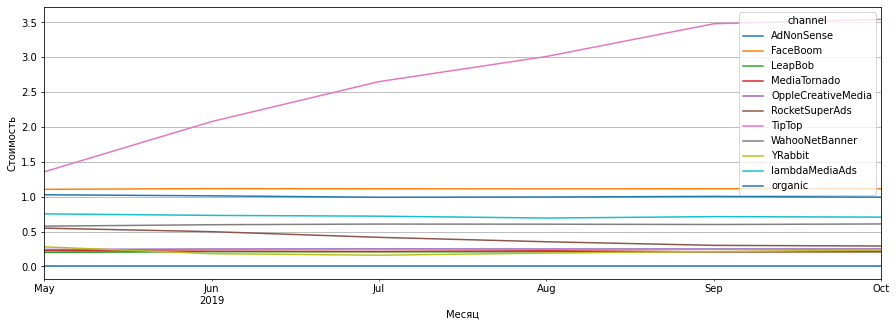

In [39]:
pivot_profiles.plot(grid=True, figsize=(15,5), xlabel='Месяц', ylabel='Стоимость')
plt.show()

На канал Тip-Тор было потрачено гораздо больше денежных средств, траты прогрессировали, начиная повышение в Мае с почти 1,5 до 3,5 в Сентябре. Увеличение вложений более чем в 2 раза. 

Рассчитаем средний CAC:

In [40]:
profiles.query('channel != "organic"')['acquisition_cost'].mean()

1.1274813239427588

In [41]:
def get_ltv_2(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Выводы:
- Определили самый дорогой рекламный источник - TipTop, за полгода вложения увеличились более, чем в 2 раза, САС у данного источника выше среднего значения для всей рекламной кампании. 
- На втором месте по вложениям располагается FaseBoom. 

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [43]:
#Построение графиков LTV, ROI и графики динамики LTV, CAC, ROI
profiles = profiles.query('channel != "organic"') #ДОПОЛНИЛА КОД
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14)

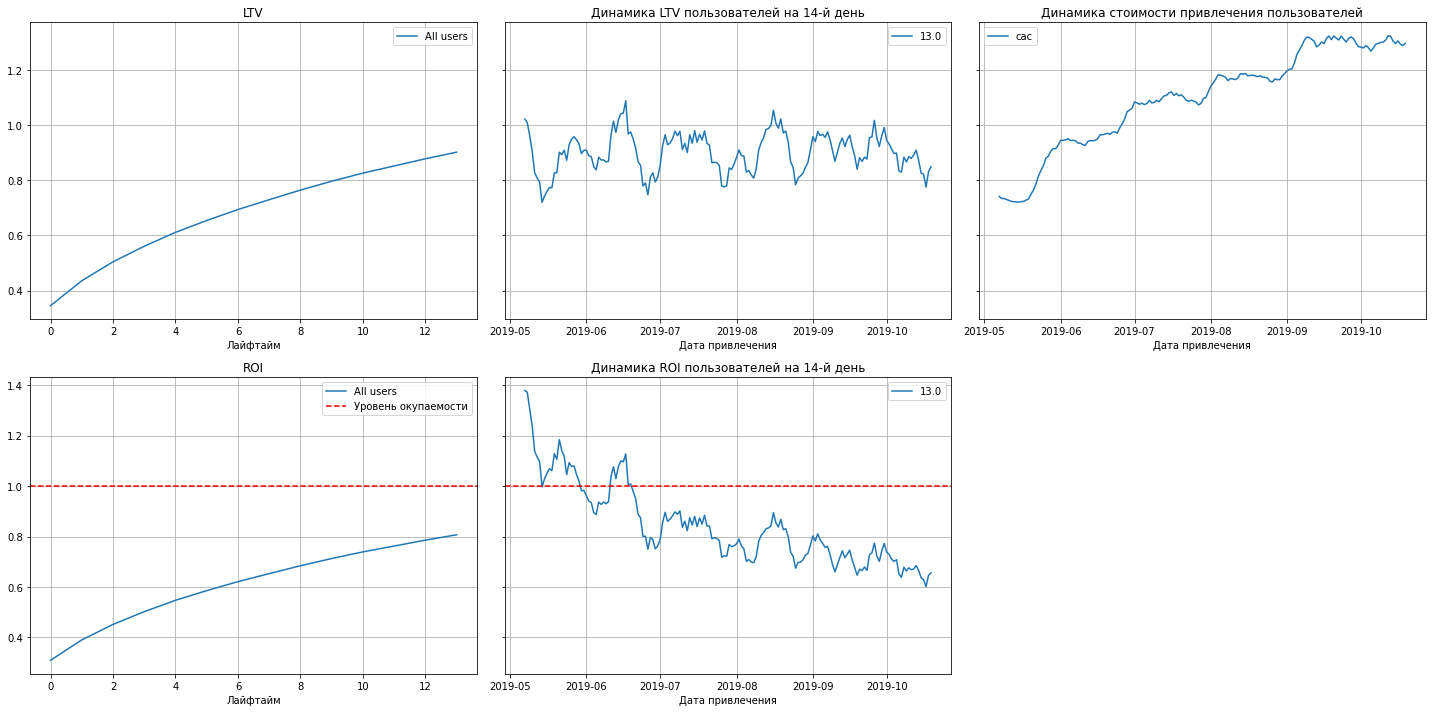

In [44]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Исходя из представленных графиков можно сделать следующие выводы:
- Общий LTV стабилен,однако идет на снижение.
- Рекалмные расходы росли постеменно начиная с мая 2019 года.
- Реклама не окупается. От начала и до середины июня периоды эффективного использования рекламных инструментов, однако с середины июня тренд ROI идет на спад.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [45]:
#Построениее графиков LTV, ROI и графики динамики LTV, CAC, ROI
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

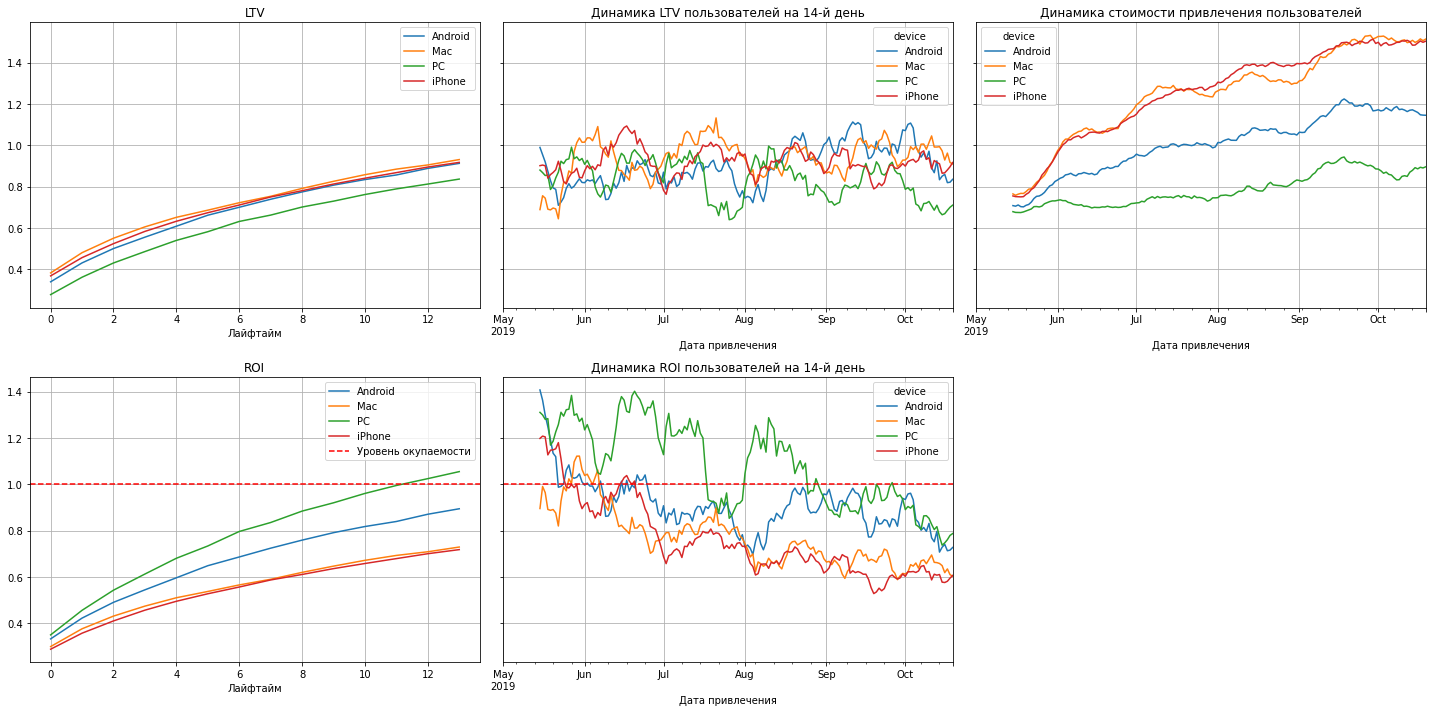

In [46]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=15)

In [47]:
#для устройств строим графики конверсии
result_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

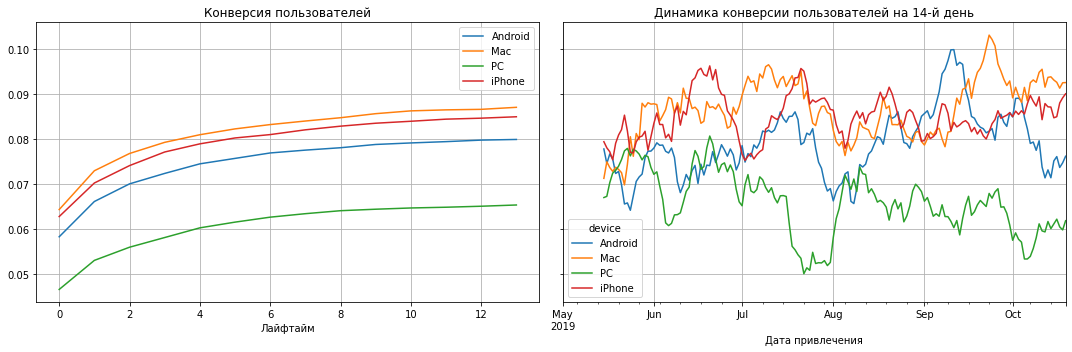

In [48]:
plot_conversion(conversion, conversion_history, 14, window=15)

Конверсия ниже в каналах устройств "PC" и "Android", однако данные устройства более эффективны, ведь с них юзер в среднем тратит больше. Для наглядности построим таблицу ниже:

In [49]:
#построим таблицу средней выручки в канале с уникальным юзером
groupby_orders = orders.groupby('user_id').agg({'revenue': 'sum'})
profiles2 = profiles.merge(groupby_orders, on='user_id', how='left')
profiles2 = profiles2.pivot_table(index='device', values='revenue', aggfunc='mean').sort_values(by='revenue', ascending=False)
profiles2

,revenue
device,
PC,26.082318
Android,22.713238
iPhone,20.761282
Mac,19.968685


In [50]:
# Построим по устройствам графики удержания
result_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

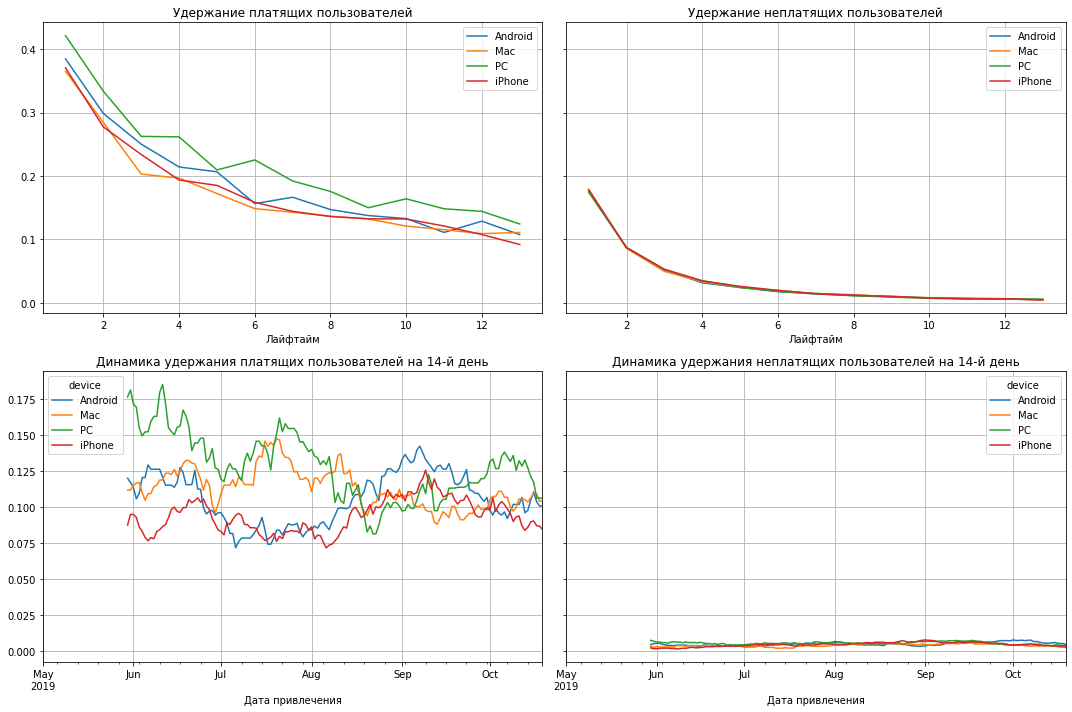

In [51]:
plot_retention(retention, retention_history, 14, window=30)

Как и предполагалось, графики показывают лучшие показатели у юзеров с девайсами "PC" и "Android".

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [52]:
#построение графиков LTV, ROI и графиков динамики LTV, CAC, ROI
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

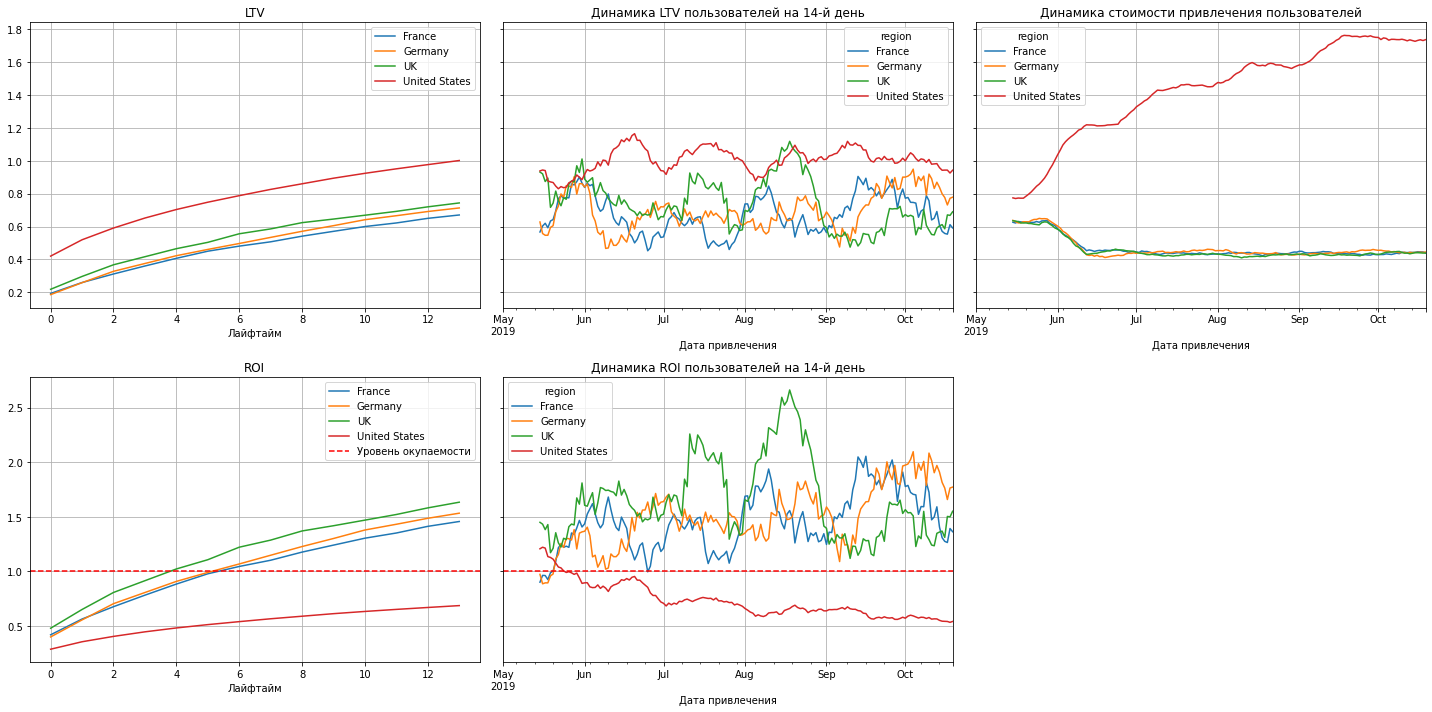

In [53]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=15)

Сделаем следующие выводы по графикам:
- все регионы, кроме США значительно проседают по расходам. Затраты на соединенные штаны постоянно высокие и растут, однако при всех вложениях, штаты являются убыточными (большие расходы на рекламу не оправдывают прирост юзеров). Ниже рассмотрим конкретно этот регион для полной картины. 

In [54]:
usa = profiles.query('region == "United States"')

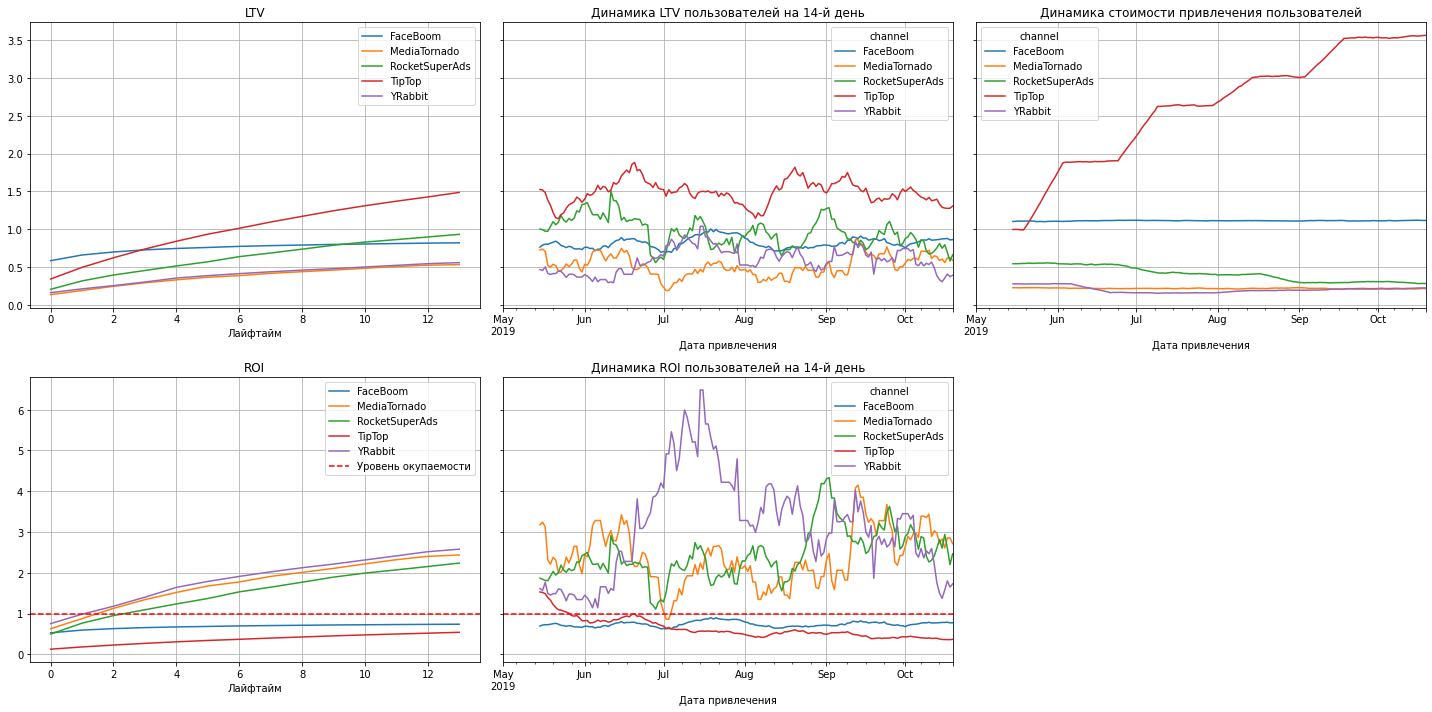

In [55]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(usa, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=15)

Сделаем промежуточные выводы по Соединенным Штатам:
- США является убыточным регионом, однако рекламные вложения поступают достаточно большие.
- ROI идет на спад достаточно стабильно в каналах, которые чаще используются (FaceBoom, TipTop).
- Однако платящих пользователей в Америке больше и конверсия, соответственно, лучше.
- Необходимо обратить внимание, к примеру, на RocketSuperAds: ROI и удержание хорошие, конверсия неплохая, канал можно рекомендовать для США. 

In [56]:
# Построение графиков конверсии по регионам
result_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

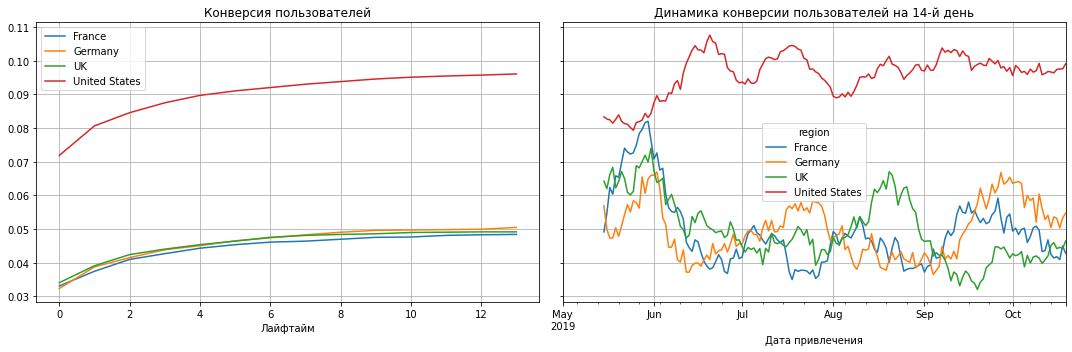

In [57]:
plot_conversion(conversion, conversion_history, 14, window=15)

In [58]:
# таблица средней выручки с уникального пользователя в каждом регионе
groupby_orders = orders.groupby('user_id').agg({'revenue': 'sum'})
profiles3 = profiles.merge(groupby_orders, on='user_id', how='left')
profiles3 = profiles3.pivot_table(index='region', values='revenue', aggfunc='mean').sort_values(by='revenue', ascending=False)
profiles3

,revenue
region,
UK,33.415923
France,30.801841
Germany,29.578122
United States,19.444088


In [59]:
result_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

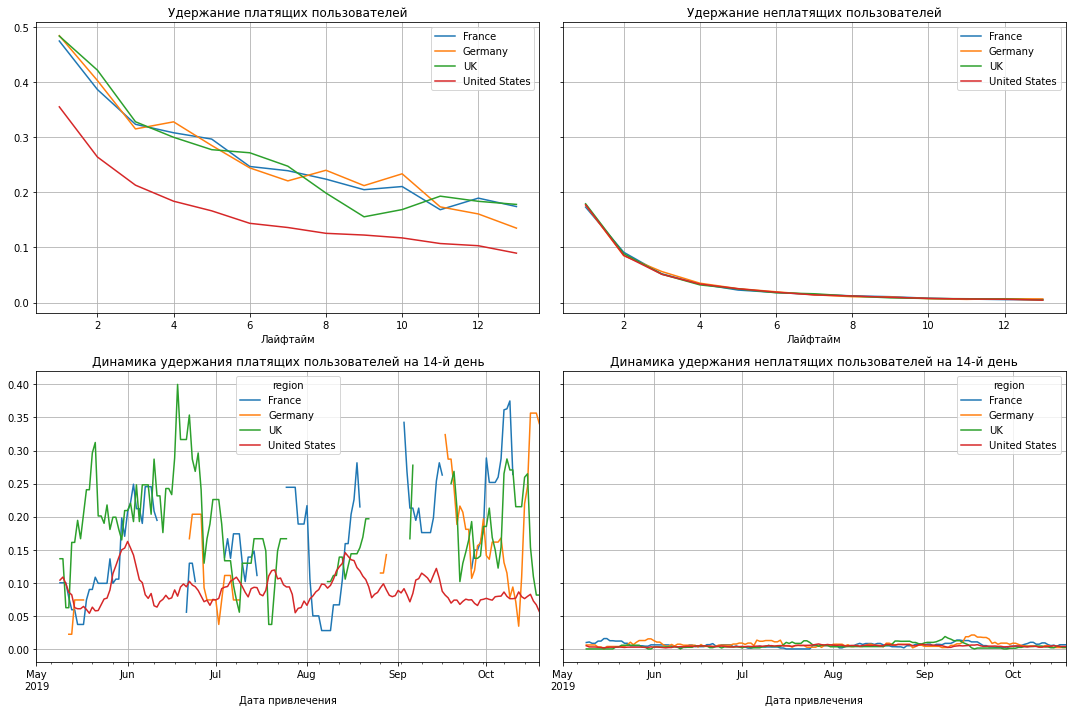

In [60]:
plot_retention(retention, retention_history, 14, window=9)

Как и говорилось выше, конкретные графики подтверждают, что у Соединенных Штатов никзие показатели удержания. 

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [61]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

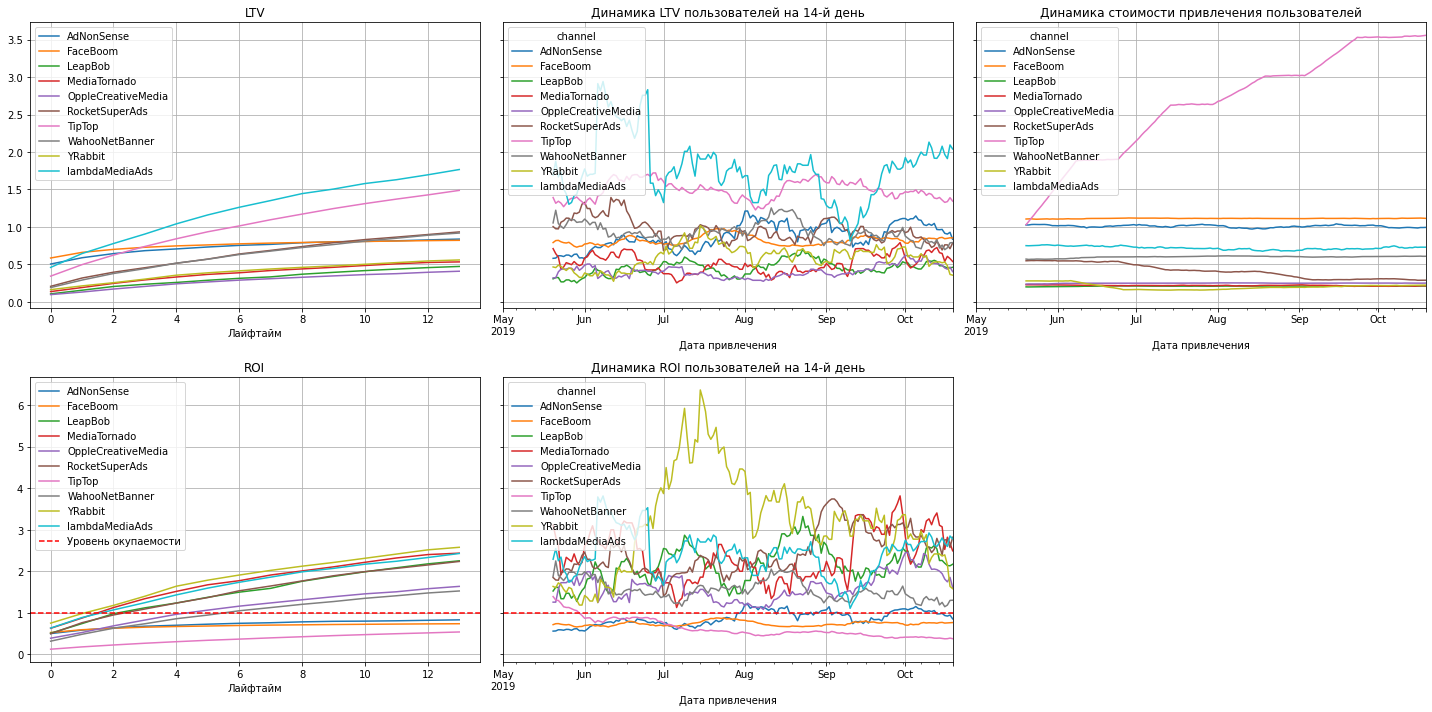

In [62]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20)

Можно отметить следующее:
- LTV 14 дня стабилен, следовательно увеличениее расхода на рекламу не показало положительного эффекта
- Рост расходов на рекламу связан с площадкой Tip Top
- Топ-3 канала по эффективности - YRabbit, MediaTornado, LambdaMediaAds.
- Каналы, которые не окупаются - TipTop, FaceBoom, AddNonSense, LeapBob и пр.


In [63]:
# Построим по каналам графики конверсии
result_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

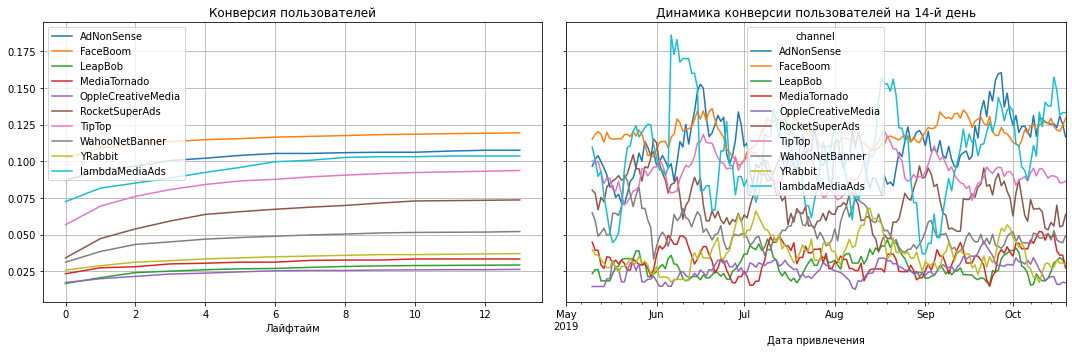

In [64]:
plot_conversion(conversion, conversion_history, 14, window=10)

Заметим наиболее перспективный канал для развития - LambdaMediaAds, неэффективный же - FaceBoom. 

In [65]:
# таблица средней выручки с уникального пользователя в канале
groupby_orders = orders.groupby('user_id').agg({'revenue': 'sum'})
profiles1 = profiles.merge(groupby_orders, on='user_id', how='left')
profiles1 = profiles1.pivot_table(index='channel', values='revenue', aggfunc='mean').sort_values(by='revenue', ascending=False)
profiles1

,revenue
channel,
WahooNetBanner,44.164746
lambdaMediaAds,39.740889
YRabbit,37.584424
TipTop,37.047263
MediaTornado,36.873846
LeapBob,36.489046
OppleCreativeMedia,35.903562
RocketSuperAds,32.949773
AdNonSense,8.402659


In [66]:
# Построим по каналам графики удержания
result_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

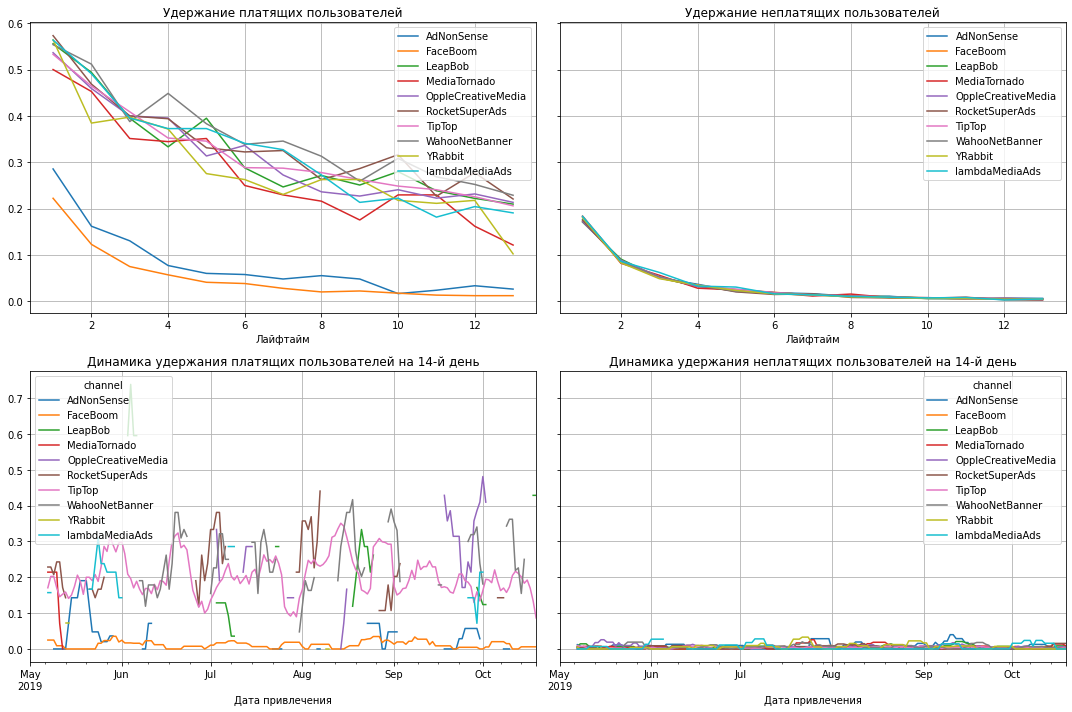

In [67]:
plot_retention(retention, retention_history, 14, window=7)

Выводы по 5 шагу:

- Окупается ли реклама, направленная на привлечение пользователей в целом? Нет, не окупается. С начала и до середины июня заметны периоды эффективного использования рекламных инструментов, однако начиная с середины июня, ROI идет на спад. Также с мая расходы на рекламу росли.

Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы? 
- По устройствам: самыми "дорогими" юзерами являются пользователи девайсов "Apple", следует отметить, что юзеры с девайсами "Mac" и "iPhone" имеют самые низкие показатели окупаемости. 
- По странам: смотря на окупаемость можно заметить, что Соединенные Штаты при таком количестве расходов убыточны, несмотря на то, что присутствует самый высокий LTV. Однако реклама не окупает себя. 
- По показателю CR - FaceBoom на первом месте (однако нет окупаемости), как и Tip Top по динамике ROI - не окупался.

- Чем могут быть вызваны проблемы окупаемости? Предполодительно неокупаемость релкамы происходит из-за настройки рекламы на слабо платежеспособную аудиторию, совершающую малые покупки (к примеру, юзеры канала FaceBoom) а также слишком большие затраты на рекламу, которые не окупаются (к примеру, как в Соединенных Штатах).

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

- Причинами неэффективности можно назвать настройку рекламы на неплатежеспособную и незаинтерисованную аудиторию. А также FaceBoom и TipTop не оправнывают такие большие инвестиции в себя. Возможно, причина в неправильной настройке рекламы.

Рекомендации:
- Переосмыслить распределение бюджета для каналов привлечения. Анализ показал, что нынешнее финансорование каналов Tip Top и FaceBoom неэффективно, несмотря на большое количество юзеров. 
- По устройствам юзеров: Mac и iPhone имеют самые низкие показатели окупаемости, рекомендуется сместить фокус на PC и Android.
- По регионам: Европа достаточно перспективна, однако для Соединенныех Штатов нужно новое решение, так как это единственный убыточный регион при данном распределении расходов на рекламу, однако при самом большом финансированни данного региона, юзеры с данного региона приносят меньше % прибыли. Для Соединенных Штатов можно рекомендовать канал RocketSuperAds - он хорошо удерживает пользователей с данного региона. 